# Python ile Makine Öğrenmesi
## İşlenecek Konular
Denetimli öğrenme algoritmaları:

- Lineer Regresyon (En Küçük Kareler Regresyonu)
- Lojistik Regresyon
- Karar Ağaçları (Decision Trees)
- Naive Bayes
- K-En Yakın Komşu (K-Nearest Neighbors, KNN)
- Destek Vektör Makineleri (Support Vector Machines, SVM)
- Rastgele Ormanlar (Random Forests)
- Gradient Boosting Machines (GBM)
- Derin Öğrenme Modelleri (Yapay Sinir Ağları)

Denetimsiz öğrenme algoritmaları:

- K-Means
- Hiyerarşik Kümeleme
- Gausian Karışım Modeli
- Expectation Maximization (EM)
- Gradient Descent (Gradyan Azalma)


#### Denetimli öğrenme (supervised learning), makine öğrenmesi alanında en yaygın kullanılan yöntemlerden biridir. Bu yöntemde, modelin eğitimine hem girdi verileri (özellikler) hem de bu verilere karşılık gelen doğru çıktılar (etiketler) kullanılarak başlanır. Model, verilen girdi-çıktı çiftleri üzerinden öğrenme yaparak, yeni ve görülmemiş girdiler için doğru tahminlerde bulunmayı amaçlar.

## Doğrusal (Lineer) Regresyon

Doğrusal (linear) regresyon, bağımsız bir değişken ile bağımlı bir değişken arasındaki ilişki hakkında daha fazla bilgi edinmek için kullanılan istatistiksel bir tekniktir. Mesela ev fiyatlarını tahmin etmek için bir lineer regresyon modeli kullanılabilir.Bağımlı değişken (Y), ev fiyatı olurken, bağımsız değişkenler (X'ler), evin özelliklerini temsil eder. Örneğin, evin büyüklüğü, konumu, oda sayısı gibi.  Analizinizde birden fazla bağımsız değişken olduğunda, bu çoklu doğrusal regresyon olarak adlandırılır.

### Yi=β0+β1Xi+ϵi 
Basit bir lineer regresyon modeli bu şekilde temsil edilir.
Bu denklem, tek bir açıklayıcı değişken olması durumunda basit doğrusal regresyon, birden fazla açıklayıcı değişken olması durumunda ise, çoklu doğrusal regresyon olarak adlandırılır.

Regresyon analizinde, örneklem için bağımlı ve bağımsız değişkenler arasındaki ilişkileri bularak popülasyonun geneli hakkında çıkarımlarda bulunmak amaçlanır. Regresyon katsayılarını tahmin etmek için genellikle OLS (Ordinary Least Squares) yöntemi kullanılır. OLS, hataların karelerinin toplamını minimize ederek en iyi katsayıları bulur.

### Doğrusal Regresyon için Varsayımlar

Doğrusal regresyonu uygulamak bazı koşulların kontrol edilmesi gereklidir.
Bunlar:

- Nicel Değişken Koşulu
>Korelasyon yalnızca her iki değişkenin de nicel olması durumunda geçerlidir.
- Yeterince düz olma koşulu
>Dağılım grafiğine bakın ve verilerinizin yaklaşık olarak doğrusal bir ilişkiye sahip olduğundan emin olun. Korelasyon yalnızca doğrusal bir ilişkinin gücünü ölçer.
- Aykırı değer durumu
>Aykırı değerler korelasyonu bozabilir. Aykırı değerler mevcut olduğunda, en iyi yol, aykırı değerleri içeren bir korelasyon ve aykırı değerleri içermeyen başka bir korelasyon hesaplamaktır.

### Doğrusal Regresyon'nun Çalışma Prensibi
- Bağımlı değişken ve bir ya da birden fazla bağımsız değişken belirlenir ve sonrasında bu değişkenelere ilişkin veriler toplanır.
- Sonrasında model parametreleri tahmin edilir.
- Model parametrelerini belirledikten sonra, modelin ne kadar iyi verilere uydurulduğunu değerlendirmek önemlidir. Bu genellikle en küçük kareler yöntemi ile yapılır, yani gözlemlenen ve tahmin edilen değerler arasındaki ortalama karesel hatayı minimize eder.
- Modelin performansını değerlendirmek için test veri seti kullanılır. Modelin tahmin gücü, doğruluk, hassasiyet ve diğer metrikler ile değerlendirilir. Modelin gerçek dünya verilerine ne kadar iyi uyarlandığı ve ne kadar iyi tahmin yaptığı bu adımda belirlenir.
- Model eğitildikten ve değerlendirildikten sonra, yeni verilerle tahminler yapılabilir. Bu, modelin özelliklerine göre bir bağımlı değişkenin değerini tahmin etmek için kullanılır.
- Modelin performansı sürekli olarak izlenir ve gerektiğinde model yeniden değerlendirilir ve ayarlanır. Veri setindeki değişikliklere veya modelin performansında farkedilen düzensizliklere göre model ayarları yapılabilir.

Aşağıda lineer regresyon ile bir evin özelliklerine göre fiyat tahmini yapan bir kod bloğu var:







Mean Squared Error: 4.0389678347315804e-28
R^2 Score: 1.0
Intercept (β0): 5.684341886080802e-14
Coefficient (β1): 2.9999999999999996
   Gerçek Değerler  Tahmin Edilen Değerler
2              210                   210.0
8              390                   390.0


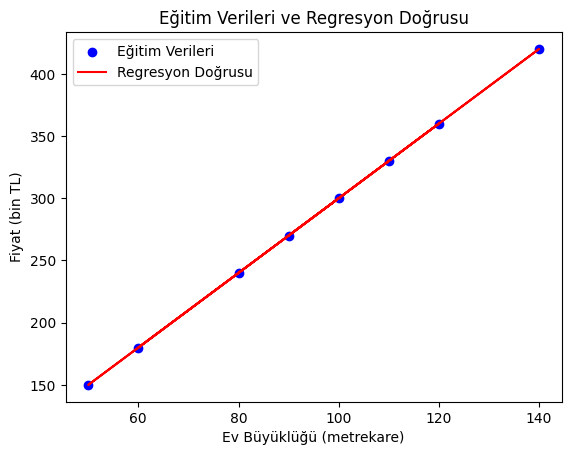

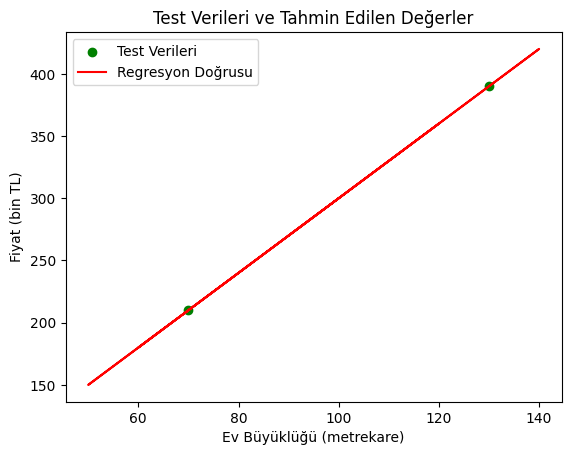

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Veriler'in alınması
data = {
    'Ev_Buyuklugu': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
    'Fiyat': [150, 180, 210, 240, 270, 300, 330, 360, 390, 420]
}

# DataFrame'e dönüştürme
df = pd.DataFrame(data)

# Bağımsız ve bağımlı değişkenlerin belirlenmesi
X = df[['Ev_Buyuklugu']]  # Bağımsız değişken
y = df['Fiyat']  # Bağımlı değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lineer regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Model katsayıları
print(f'Intercept (β0): {model.intercept_}')
print(f'Coefficient (β1): {model.coef_[0]}')

# Gerçek ve tahmin edilen değerleri karşılaştırma
comparison = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})
print(comparison)

# Eğitim seti ve regresyon doğrusunu görselleştirme
plt.scatter(X_train, y_train, color='blue', label='Eğitim Verileri')
plt.plot(X_train, model.predict(X_train), color='red', label='Regresyon Doğrusu')
plt.xlabel('Ev Büyüklüğü (metrekare)')
plt.ylabel('Fiyat (bin TL)')
plt.title('Eğitim Verileri ve Regresyon Doğrusu')
plt.legend()
plt.show()

# Test seti ve tahmin edilen değerleri görselleştirme
plt.scatter(X_test, y_test, color='green', label='Test Verileri')
plt.plot(X_train, model.predict(X_train), color='red', label='Regresyon Doğrusu')
plt.xlabel('Ev Büyüklüğü (metrekare)')
plt.ylabel('Fiyat (bin TL)')
plt.title('Test Verileri ve Tahmin Edilen Değerler')
plt.legend()
plt.show()


## Mantıksal Regresyon
Mantıksal regresyon, bağımlı değişkenin ikili gözlendiği durumlarda, bağımlı değişken ile bağımsız değişkenlerin neden sonuç ilişkisini belirlemede kullanılan, bağımsız değişkenlere göre bağımlı değişkeninin beklenen değerlerinin olasılık olarak elde edildiği bir regresyon yöntemidir.

Mantıksal regresyon, bağımlı değişkenin belirli bir sınıfa ait olma olasılığını tahmin etmek için kullanılan bir modeldir. İkili sınıflandırma problemlerinde, bağımlı değişken genellikle 0 veya 1 (hayır veya evet, negatif veya pozitif, vb.) olur. Mantıksal regresyon, doğrusal regresyonun bir türüdür ancak bazı dönüşümler içerir.

#### İşte formülü: logit(p) = log((1 - p) / p) = β₀ + β₁X₁ + β₂X₂ + ⋯ + βₙXₙ
Buradaki "p" sigmoid fonksiyonudur.


##### Örnek olarak mantıksal regresyon kullanılarak illerin heyelana duyarlılığı tahmin edilebilir.
#### Gelin bunu koda dökelim:


Accuracy: 0.5
Confusion Matrix:
[[1 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2



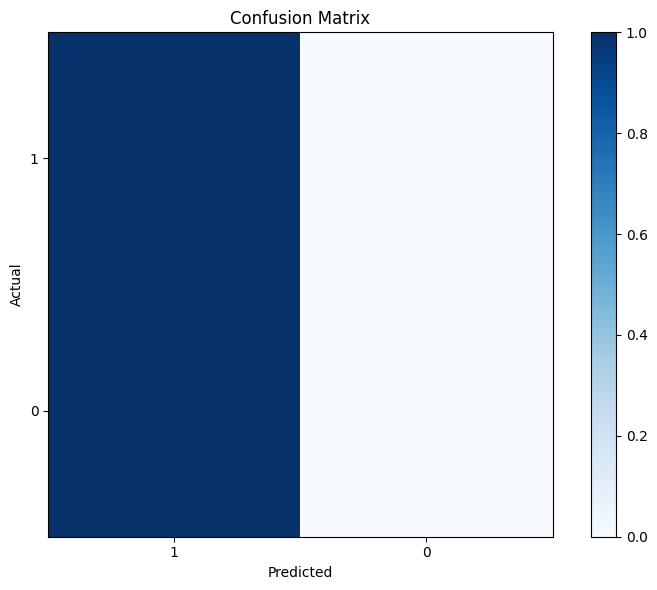

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Veri setini oluşturma
data = pd.read_csv('/kaggle/input/landslide/landslidedata.csv')

# Kategorik değişkenleri label encoding ile dönüştürme
label_encoder = LabelEncoder()
data['Soil_Type'] = label_encoder.fit_transform(data['Soil_Type'])
data['Land_Use'] = label_encoder.fit_transform(data['Land_Use'])
data['Geology'] = label_encoder.fit_transform(data['Geology'])

# Bağımsız ve bağımlı değişkenleri belirleme
X = data[['Slope', 'Elevation', 'Soil_Type', 'Land_Use', 'Precipitation', 'Geology']]
y = data['Landslide']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mantıksal regresyon modelini oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Karmaşıklık matrisi görselleştirme
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(data['Landslide'].unique()))
plt.xticks(tick_marks, data['Landslide'].unique())
plt.yticks(tick_marks, data['Landslide'].unique())

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


## Karar Ağaçları

 Temel olarak, veri kümesini belirli bir hedef değişkeni veya sınıfa göre bölerek, her bölgeye bir karar kuralı uygular. Bu bölme işlemi, enformasyon kazancı veya veri homojenliği gibi ölçütlere dayanarak gerçekleştirilir. Karar ağaçları, veriye basit, yorumlanabilir bir yapı sağlar ve aşağıdaki özelliklere sahiptir:
 
##### Karar Noktaları (Nodes): Her bir düğüm, bir karar noktasını veya veri bölünmesini temsil eder.
##### Kenarlar (Edges): Her kenar, bir karar sonucunda alınabilecek farklı yolları temsil eder.
##### Kök Düğüm (Root Node): Ağacın başlangıç ​​noktasıdır ve ilk bölümleme kuralını temsil eder.
##### Yaprak Düğümler (Leaf Nodes): Ağacın son düğümleridir ve sınıf veya regresyon tahminlerini içerir.



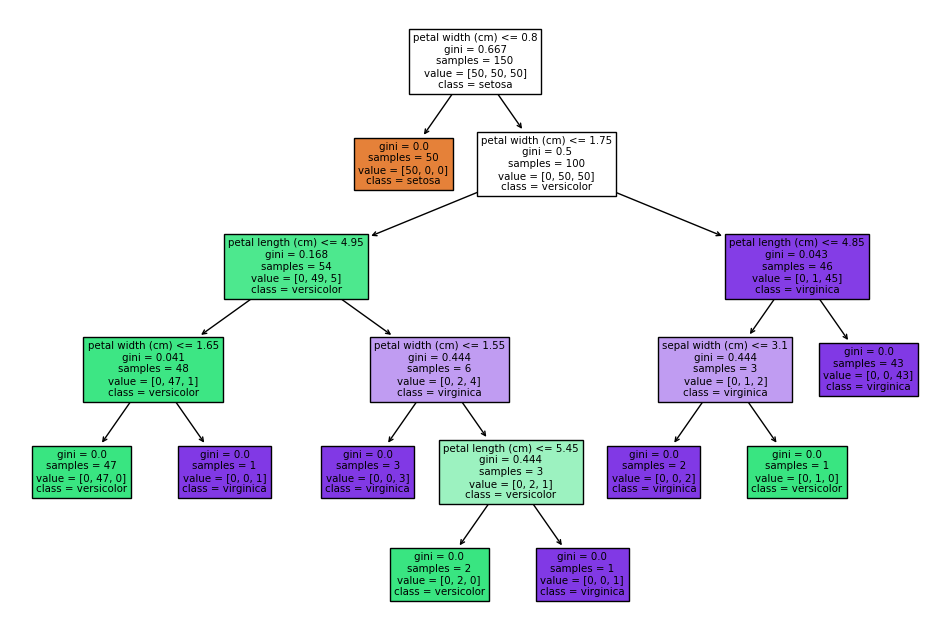

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Iris veri setini yükleme
iris = load_iris()
X = iris.data
y = iris.target

# Karar ağacı modelini oluşturma
model = DecisionTreeClassifier()
model.fit(X, y)

# Karar ağacını görselleştirme
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


## Naive Bayes
Naive Bayes, makine öğrenimi alanında sınıflandırma ve olasılık tahmini yapmak için kullanılan bir algoritmadır. Temel olarak, Bayes teoreminin temelini alır ve bu teoremi kullanarak özelliklerin bir sınıfa ait olma olasılıklarını tahmin eder.

Algoritmanın "naive" (saf) olarak adlandırılmasının nedeni, özellikler arasındaki ilişkiyi basitleştiren ve her özelliğin sınıf etiketi üzerinde bağımsız olduğunu varsayan bir varsayım kullanmasıdır. Bu, özellikler arasındaki ilişkilerin basit veya belirgin olmadığı durumlarda bile genellikle iyi çalışır.

Naive Bayes algoritması, veri kümesindeki özelliklerin dağılımına ve sınıf etiketlerine dayalı olarak bir model oluşturur. Ardından, yeni örneklerin sınıf etiketlerini tahmin etmek için bu modeli kullanır.

Naive Bayes algoritması, veri setinin boyutu büyüdükçe daha verimli hale gelir ve genellikle metin sınıflandırması gibi uygulamalarda iyi performans gösterir. Bununla birlikte, özellikler arasındaki gerçek ilişkileri dikkate almadığı için bazı durumlarda doğruluk oranı düşük olabilir.

##### Öneri sistemlerinde kullanılabilir.

#### İşte bir örnek:

Model doğruluğu: 0.3333333333333333
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.67      0.50      0.25         3
weighted avg       0.78      0.33      0.17         3



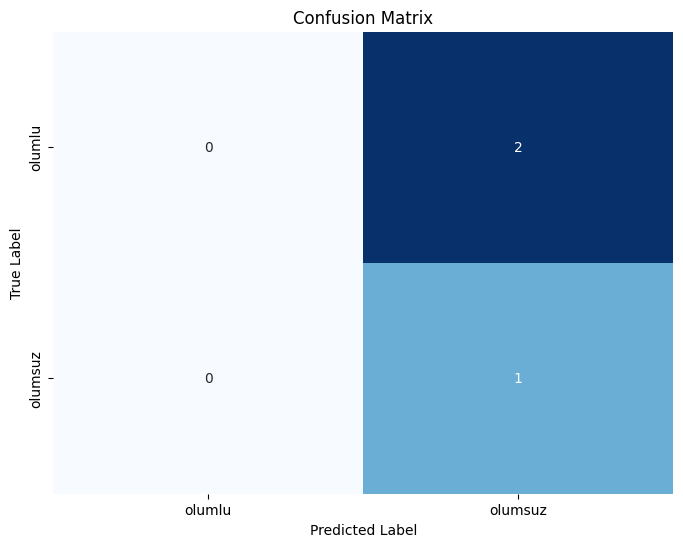

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Daha büyük ve dengeli bir veri kümesi oluşturma
veri = pd.DataFrame({
    "metin": [
        "Bu film gerçekten harika!",
        "Bu film çok kötüydü.",
        "Harika bir deneyim yaşadım.",
        "Çok sıkıcı bir film.",
        "Harika bir konsept ama kötü uygulanmış.",
        "Film mükemmel değil ama iyiydi.",
        "Çok etkileyiciydi.",
        "Bu film kesinlikle başyapıt!",
        "Berbat bir deneyimdi.",
        "Sonsuza kadar sürdü gibi hissetti.",
        "Harika bir film. Kesinlikle tavsiye ederim.",
        "İzlediğim en kötü film."
    ],
    "etiket": ["olumlu", "olumsuz", "olumlu", "olumsuz", "olumsuz", "olumlu",
               "olumlu", "olumlu", "olumsuz", "olumsuz", "olumlu", "olumsuz"]
})

# Veri kümesindeki etiketleri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
veri['etiket'] = label_encoder.fit_transform(veri['etiket'])

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(veri['metin'], veri['etiket'], test_size=0.2, random_state=42)

# TF-IDF vektörlerini oluşturma ve sınıflandırıcıyı eğitme
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC(kernel='linear'))
])

# Modeli eğitme
pipeline.fit(X_train, y_train)

# Modelin performansını değerlendirme
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model doğruluğu:", accuracy)

# Sınıflandırma raporu
print(classification_report(y_test, y_pred, zero_division=1))

# Karmaşıklık matrisini oluşturma
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### K-NN En Yakın Komşu
K-Nearest Neighbors (KNN), bir makine öğrenimi algoritmasıdır ve sınıflandırma ve regresyon problemleri için kullanılabilir. Temel fikir, bir veri noktasını etiketlemek veya bir tahmin yapmak için o noktaya en yakın komşularının etiketlerine veya değerlerine dayanmaktadır.

Algoritma şu adımları izler:

Veri noktası ve bir k değeri belirlenir.
Tahmin yapılacak yeni bir veri noktası verildiğinde, bu noktaya en yakın k veri noktası belirlenir.
Sınıflandırma için, en yakın k veri noktasının sınıfı (en sık görülen sınıf) tahmin olarak kullanılır.
Regresyon için, en yakın k veri noktasının değerlerinin ortalaması tahmin olarak kullanılır.

KNN, basit bir yapıya ve uygulaması kolay olmasına rağmen, büyük veri setlerinde ve yüksek boyutlu özellik uzaylarında hesaplama maliyeti artabilir. Ayrıca, veri setindeki gürültüye ve gereksiz özelliklere duyarlı olabilir.

Tahmin edilen meyve türü: ['elma']


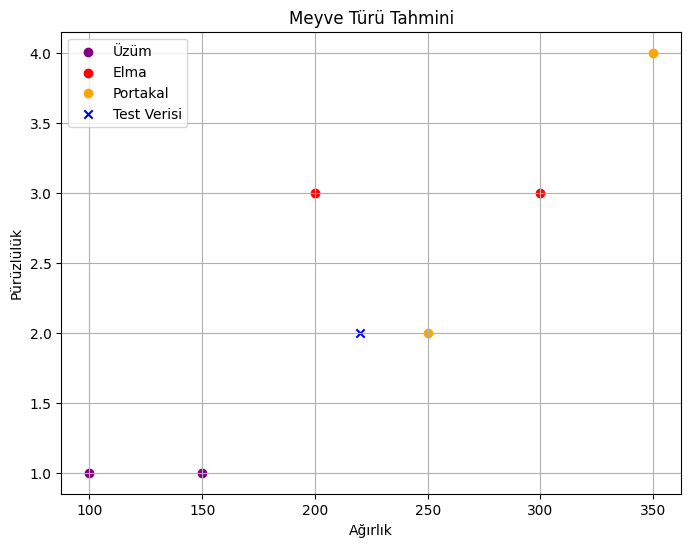

In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Veri seti
X_train = np.array([[100, 1], [150, 1], [200, 3], [300, 3], [250, 2], [350, 4]])  # [ağırlık, pürüzlülük]
y_train = np.array(['üzüm', 'üzüm', 'elma', 'elma', 'portakal', 'portakal'])

# KNN modelini oluşturma
k = 3  # komşuluk sayısı
knn_model = KNeighborsClassifier(n_neighbors=k)

# Modeli eğitme
knn_model.fit(X_train, y_train)

# Test verisi
X_test = np.array([[220, 2]])  # Test verisi: [ağırlık, pürüzlülük]

# Tahmin yapma
y_pred = knn_model.predict(X_test)
print("Tahmin edilen meyve türü:", y_pred)

# Veri noktalarını görselleştirme
plt.figure(figsize=(8, 6))

# Eğitim veri noktalarını görselleştirme
plt.scatter(X_train[y_train == 'üzüm'][:, 0], X_train[y_train == 'üzüm'][:, 1], color='purple', label='Üzüm')
plt.scatter(X_train[y_train == 'elma'][:, 0], X_train[y_train == 'elma'][:, 1], color='red', label='Elma')
plt.scatter(X_train[y_train == 'portakal'][:, 0], X_train[y_train == 'portakal'][:, 1], color='orange', label='Portakal')

# Test veri noktasını görselleştirme
plt.scatter(X_test[:, 0], X_test[:, 1], color='blue', marker='x', label='Test Verisi')

plt.xlabel('Ağırlık')
plt.ylabel('Pürüzlülük')
plt.title('Meyve Türü Tahmini')
plt.legend()
plt.grid(True)
plt.show()


Bu örnekte, 6 adet örnekle (meyve) bir eğitim veri setimiz var. Her meyve için ağırlık ve kabuğun pürüzlülüğü özelliklerini içeriyor. Ardından, 220 gram ağırlığında ve 2 pürüzlülük seviyesine sahip bir meyveyi tahmin etmek için KNN modelini kullanıyoruz. Tahmin sonucunda, bu meyvenin bir elma olduğunu tahmin ediyoruz.

### Destek Vektör Makineleri (SVM)
Destek Vektör Makineleri (Support Vector Machines - SVM), hem sınıflandırma hem de regresyon problemleri için kullanılan bir makine öğrenimi algoritmasıdır. SVM, veri noktalarını belirli sınıflara ayırmak veya bir regresyon çizgisi oluşturmak için kullanılır.

SVM'in ana hedefi, veri noktalarını en iyi şekilde ayıran veya regresyon çizgisini oluşturan bir hiperdüzlem bulmaktır. SVM, sınıflar arasındaki maksimum marjı (mesafe) elde etmek için bu hiperdüzlemi optimize eder. Bu marj, sınıflar arasında bir ayrım yapma kabiliyetini ifade eder.

Doğruluk: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



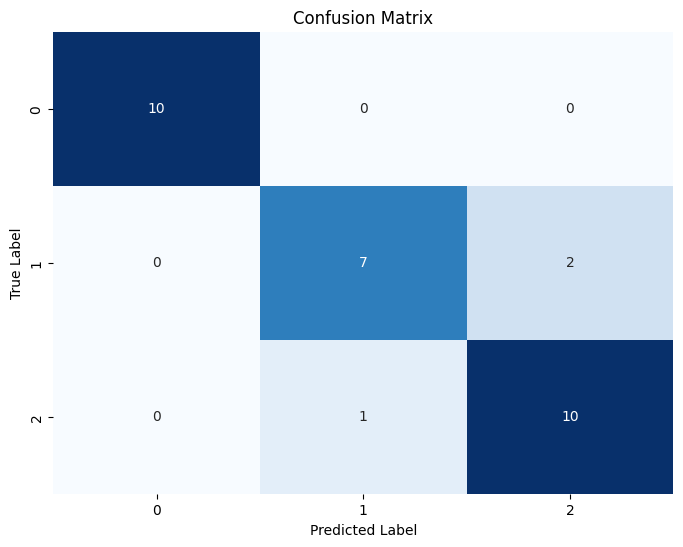

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Veri kümesini yükleme
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sadece ilk iki özellikleri alıyoruz
y = iris.target

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM modelini oluşturma ve eğitme
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = svm_model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

# Sınıflandırma raporu
print(classification_report(y_test, y_pred))

# Karışıklık matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Iris veri setini kullanarak SVM modeli oluşturur ve eğitir. Daha sonra, test seti üzerinde tahmin yapar ve modelin performansını değerlendirir. Ayrıca, sınıflandırma raporu ve karışıklık matrisi görselleştirmesi de sağlanır.

### Karmaşık Ağaçlar 
Random Forests, sınıflandırma, regresyon ve diğer makine öğrenimi görevleri için kullanılan bir ensemble öğrenme yöntemidir. Bu yöntem, birden çok karar ağacının bir araya getirilerek güçlendirilmiş bir model oluşturulmasını sağlar.

Random Forests, temelde birçok karar ağacını bir araya getirir ve bu ağaçların tahminlerini bir araya getirerek daha güçlü bir tahmin yapar. Her bir karar ağacı, rastgele örneklem alınmış veri örneğiyle ve rastgele seçilmiş özelliklerle eğitilir. Bu, her ağacın farklı bir şekilde eğitilmesini sağlar ve modelin genelleme yeteneğini artırır.

Doğruluk: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



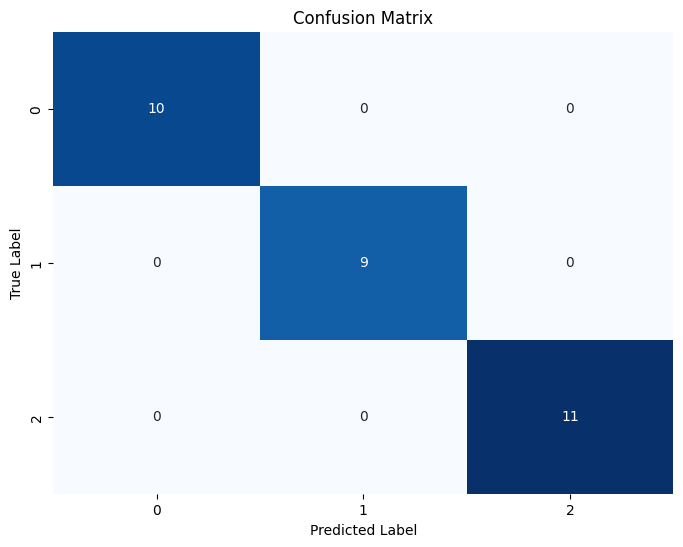

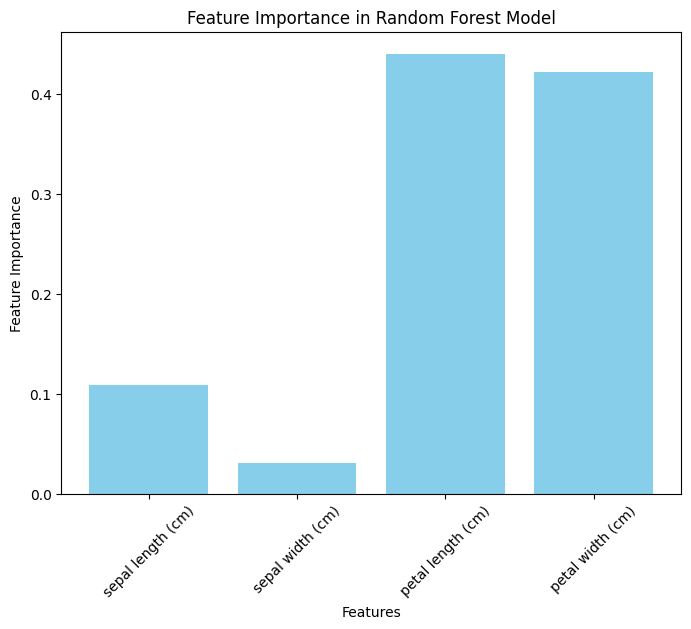

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Veri yükleme
iris = load_iris()
X = iris.data
y = iris.target

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma ve eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = rf_model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

# Sınıflandırma raporu
print(classification_report(y_test, y_pred))

# Karışıklık matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Özellik önem sıralamasını görselleştirme
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), feature_importances, align='center', color='skyblue')
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


### Gradyan Arttırma Makineleri
Gradient Boosting Machines (GBM), ensemble öğrenme yöntemlerinden biri olan Gradient Boosting'in bir türevidir. GBM, zayıf tahmin edicileri (genellikle karar ağaçları) bir araya getirerek güçlü bir tahmin modeli oluşturur. Bu yöntem, özellikle sınıflandırma ve regresyon problemleri için yaygın olarak kullanılır.

GBM'in ana prensibi, zayıf tahmin edicilerin (örneğin, karar ağaçlarının) ardışık olarak eğitilmesi ve bu tahmincilerin artan derecelerdeki hatalarını düzeltmek için kullanılmasıdır. Her bir yeni tahminci, önceki tahmincilerin hatalarını azaltmaya odaklanır.


Doğruluk: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



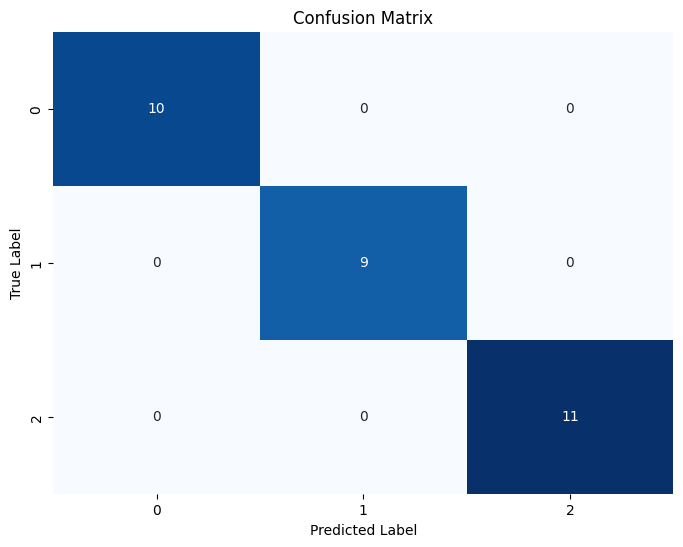

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Veri yükleme
iris = load_iris()
X = iris.data
y = iris.target

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting modelini oluşturma ve eğitme
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = gbm_model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

# Sınıflandırma raporu
print(classification_report(y_test, y_pred))

# Karışıklık matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Yapay Sinir Ağları
Yapay sinir ağları (YSA), insan beyninin özelliklerinden olan öğrenme yolu ile yeni bilgiler türetebilme, yeni bilgiler oluşturabilme ve keşfedebilme gibi yetenekleri, herhangi bir yardım almadan otomatik olarak gerçekleştirebilmek amacı ile geliştirilen bilgisayar sistemleridir.

Yapay sinir ağları insan beyni örnek alınarak, öğrenme sürecinin matematiksel olarak modellenmesi sonucu ortaya çıkmıştır. Beyindeki biyolojik sinir ağlarının yapısını, öğrenme, hatırlama ve genelleme kabiliyetlerini taklit eder. Yapay sinir ağlarında öğrenme işlemi örnekler kullanılarak gerçekleştirilir. Öğrenme esnasında giriş çıkış bilgileri verilerek, kurallar koyulur.

#### Yapay Sinir Ağlarının Avantajları
- Yapay Sinir Ağları bir çok hücreden meydana gelir ve bu hücreler eş zamanlı çalışarak karmaşık işleri gerçekleştirir.
- Öğrenme kabiliyeti vardır ve farklı öğrenme algoritmalarıyla öğrenebilirler.
- Görülmemiş çıktılar için sonuç (bilgi) üretebilirler. Gözetimsiz öğrenim söz konusudur.
- Örüntü tanıma ve sınıflandırma yapabilirler. Eksik örüntüleri tamamlayabilirler.
- Hata toleransına sahiptirler. Eksik veya belirsiz bilgiyle çalışabilirler. Hatalı durumlarda dereceli bozulma (graceful degradation) gösterirler.
- Paralel çalışabilmekte ve gerçek zamanlı bilgiyi işleyebilmektedirler.
#### Yapay Sinir Ağlarının Kullanım Alanları
- Hesaplamalı finans
- Görüntü işleme ve bilgisayarla görü
- Hesaplamalı biyoloji
- Enerji üretimi 
- Otomotiv, havacılık ve üretim
- Doğal dil işleme



2024-05-27 16:15:59.993138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 16:15:59.993297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 16:16:00.157717: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0000e+00 - loss: 1.7266 - val_accuracy: 0.0000e+00 - val_loss: 1.7384
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0043 - loss: 1.6736 - val_accuracy: 0.0000e+00 - val_loss: 1.5954
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0561 - loss: 1.4852 - val_accuracy: 0.2500 - val_loss: 1.4838
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0653 - loss: 1.4450 - val_accuracy: 0.2500 - val_loss: 1.3903
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1215 - loss: 1.3383 - val_accuracy: 0.2500 - val_loss: 1.3066
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2156 - loss: 1.2585 - val_accuracy: 0.4167 - val_loss: 1.2320
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2820 - loss: 1.2238 - val_accuracy: 0.4167 - val_loss: 1.1721
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2947 - loss: 1.1766 - val_accuracy: 0.416

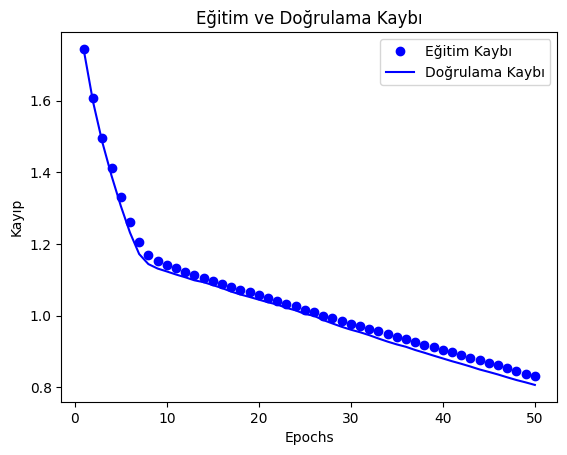

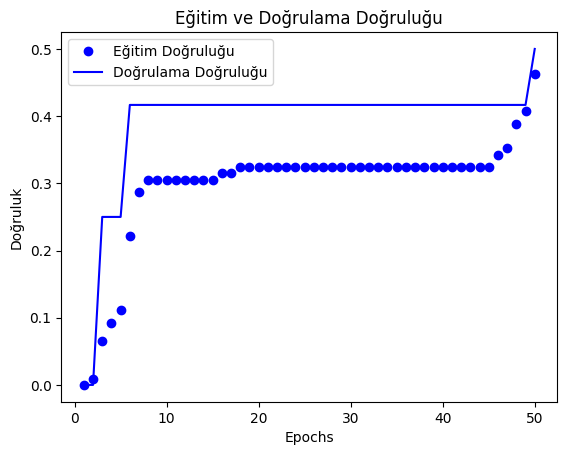

In [9]:
import numpy as np
from keras.layers import Input
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# İris veri setini yükleme
iris = load_iris()
X = iris.data
y = iris.target

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Etiketleri kategorik hale getirme
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))


# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

# Modelin performansını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Eğitim ve doğrulama kayıp değerlerini ve doğruluk değerlerini çizme
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Eğitim Doğruluğu')
plt.plot(epochs, val_acc, 'b', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


İris veri setini kullanarak bir çok katmanlı yapay sinir ağı (MLP) modeli oluşturur ve eğittik.

#### Denetimsiz öğrenme, modeli denetlemeniz gerekmeyen bir makine öğrenme tekniğidir. Bunun yerine, modelin bilgi keşfetmek için kendi başına çalışmasına izin vermeniz gerekir. Temel olarak etiketlenmemiş verilerle ilgilenir.Denetimsiz öğrenme algoritmaları, denetimli öğrenmeye kıyasla daha karmaşık işlem görevlerini gerçekleştirmenizi sağlar.

## K-Means
K-Means Algoritması (K-Means Clustering) bir dizi veri noktasını k adet kümeye bölmek için kullanılan denetimsiz bir makine öğrenimi algoritmasıdır.

K-Means Algoritmasının arkasındaki temel fikir verileri her kümenin ağırlık merkezine göre K kümelerine bölmek ve her bir veri noktası için karşılık gelen kümenin ağırlık merkezi arasındaki kareleri alınmış mesafelerin toplamını en aza indirmektir. Her küme kendi merkezi tarafından temsil edilir. Centroid, kümedeki temsili bir noktadır ve o kümedeki tüm veri noktalarının ortalaması olarak hesaplanır.

#### Kullanıldığı alanlar:
- Örüntü Tanıma
- Tavsiye Sistemleri
- Müşteri Segmentasyonu
- Anomali Tespiti
- Metin Kümeleme

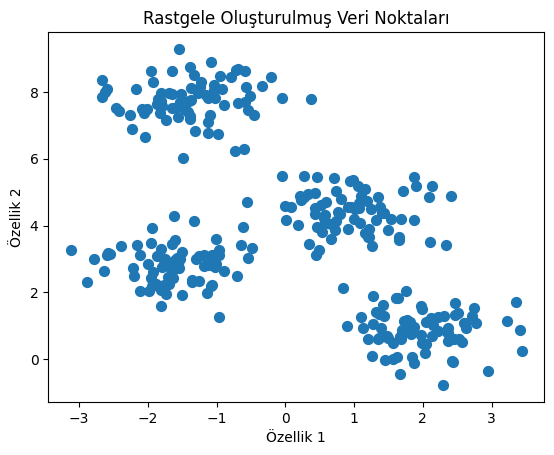

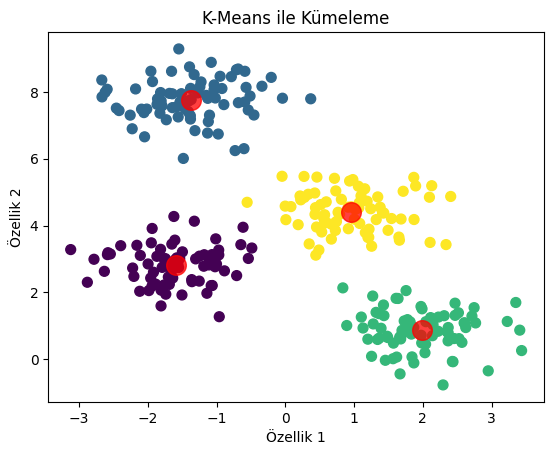

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Rastgele veri noktaları oluşturma
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Veri noktalarını çizme
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Rastgele Oluşturulmuş Veri Noktaları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

# K-Means modelini oluşturma ve eğitme
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)

# Merkez noktalarını ve kümeleri çizme
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means ile Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()


Bu kod, make_blobs fonksiyonu kullanılarak rastgele bir veri seti oluşturur. Daha sonra, bu veri setini K-Means algoritması kullanarak dört küme halinde gruplandırır. Son olarak, veri noktalarını ve küme merkezlerini çizerek kümeleme sonucunu görselleştirir.

## Hiyerarşik Kümeleme
Hiyerarşik kümeleme analizi, denetimsiz makine ogrenimi yöntemlerinden biridir. Bu yöntemde amaç, gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır. Fakat, buradaki kümelere ayırma işlemi, hiyerarşik olarak gerçekleşir.

 Hiyerarşik kümeleme, iki ana yaklaşımı içerir: agglomeratif (aşağıdan yukarıya) ve bölücü (yukarıdan aşağıya) kümeleme. En yaygın olanı agglomeratif kümeleme yöntemidir.

Agglomeratif kümeleme, her veri noktasını başlangıçta kendi kümesi olarak ele alır ve en yakın kümeleri iteratif olarak birleştirir. Bu süreç, tüm veri noktaları tek bir küme oluşturana kadar devam eder.

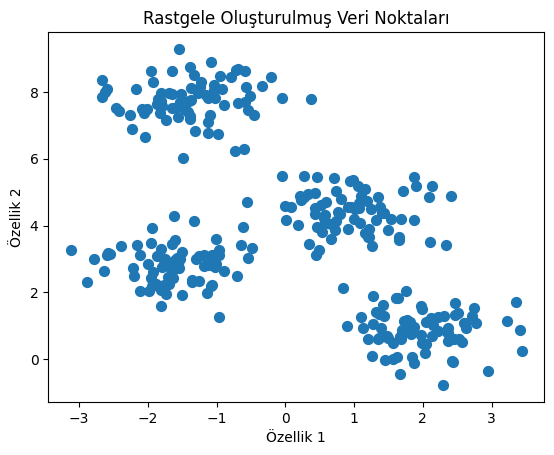

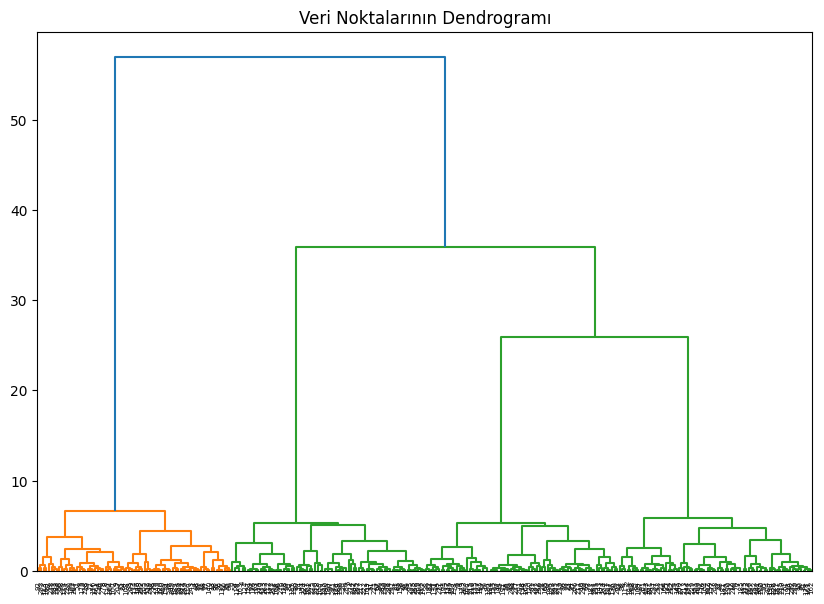

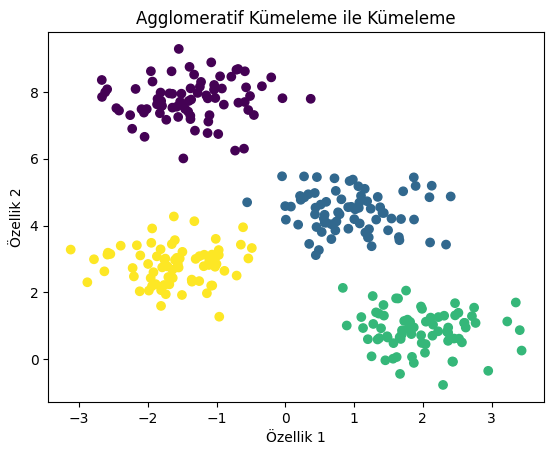

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Rastgele veri noktaları oluşturma
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Veri noktalarını çizme
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Rastgele Oluşturulmuş Veri Noktaları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

# Dendrogram oluşturma
plt.figure(figsize=(10, 7))
plt.title("Veri Noktalarının Dendrogramı")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.show()

# Hiyerarşik Kümeleme modelini oluşturma ve eğitme
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_pred = cluster.fit_predict(X)

# Kümeleri çizme
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Agglomeratif Kümeleme ile Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()


## Gauss Karışım Modeli
Gauss Karışım Modeli (Gaussian Mixture Model, GMM), veri kümesini birden fazla Gauss (normal) dağılımının birleşimi olarak modelleyen bir olasılıksal kümeleme yöntemidir. GMM, veri noktalarının belirli bir olasılıkla bir veya daha fazla Gauss dağılımına ait olduğunu varsayar. Her Gauss dağılımı bir küme veya bileşen olarak düşünülebilir.

Bileşenler (Components): GMM, her biri kendi ortalama (mean) ve kovaryans (covariance) matrisine sahip olan 
𝑘
k sayıda Gauss dağılımı kullanır. Bu bileşenler veri kümesinin alt gruplarını temsil eder.

Olasılıklar (Probabilities): Her veri noktasının belirli bir bileşene ait olma olasılığı hesaplanır. Bu olasılıklar, bileşenlerin ağırlıkları ile birlikte kullanılarak her veri noktasının genel dağılıma olan katkısı belirlenir.

Beklenti-Maximizasyon (Expectation-Maximization, EM) Algoritması: GMM'in parametrelerini öğrenmek için kullanılan iteratif bir yöntemdir. İki ana adımdan oluşur:

- Beklenti Adımı (Expectation Step, E-step): Mevcut parametrelerle her veri noktasının her bileşene ait olma olasılıkları hesaplanır.
- Maximizasyon Adımı (Maximization Step, M-step): Hesaplanan bu olasılıklar kullanılarak model parametreleri (ortalama, kovaryans ve bileşen ağırlıkları) güncellenir.

#### Örnek Kullanımlar
- Finans modellemeleri
- Konut fiyatlaması
- El yazı tanıma
- Ses sınıflandırma/ tanıma
- Fuzzy image segmentation

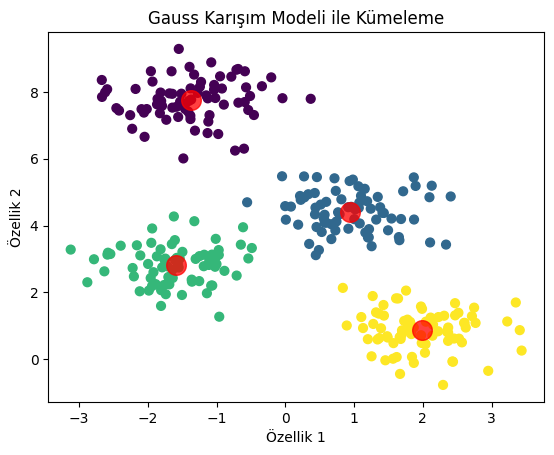

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Rastgele veri noktaları oluşturma
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Gauss Karışım Modeli ile kümeleme
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)

# Kümeleri ve bileşen merkezlerini çizme
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.75)
plt.title('Gauss Karışım Modeli ile Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()


## Expectation Maximization (EM)
EM (Expectation-Maximization) algoritması, özellikle eksik veri problemleriyle başa çıkmak için kullanılan bir istatistiksel öğrenme algoritmasıdır. Makine öğrenimi uygulamaları, bazen gözlemlenebilir, bazen de gözlemlenemeyen değişkenlerle uğraşırken, eksik veri durumlarında parametre tahminini gerçekleştirmek için bu algoritma önemlidir.

Eksik veri problemleri, bir değişkenin sadece belirli durumlarda gözlemlendiği veya eksik olduğu durumları içerir. Makine öğrenimi algoritmaları, bu tür durumlarla başa çıkarken, gözlemlenen verilerden modelleri ve ilişkileri öğrenir. Ancak, bu modellerde eksik veri olduğunda tahmin yapmak zordur.

EM algoritması, bu eksik veri durumlarını ele almak için kullanılır. Genellikle parametrik olasılık dağılımı olan modellerle çalışır ve bu modellerdeki parametreleri tahmin etmeye odaklanır. Model uyumunu iyileştirmek için yinelemeli bir süreç oluşturan algoritma, iki ana adımdan oluşur: Expectation (Beklenti) ve Maximization (Maksimizasyon).

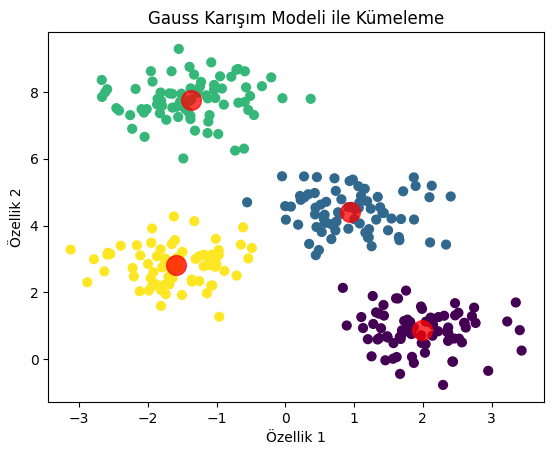

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Rastgele veri noktaları oluşturma
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Gauss Karışım Modeli ile kümeleme
gmm = GaussianMixture(n_components=4, max_iter=100, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

# Kümeleri ve bileşen merkezlerini çizme
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.75)
plt.title('Gauss Karışım Modeli ile Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()


## Gradient descent
Gradient Descent (Gradyan İnişi), bir hedef fonksiyonun (genellikle bir kayıp veya maliyet fonksiyonu) minimumunu bulmak için kullanılan bir optimizasyon algoritmasıdır. Makine öğrenmesi ve derin öğrenme modellerinin eğitiminde yaygın olarak kullanılır. Gradient Descent, özellikle büyük veri kümeleri ve yüksek boyutlu uzaylar için uygun bir optimizasyon yöntemidir.

#### Gradient Descent Türleri:
- Batch Gradient Descent: Tüm veri setini kullanarak gradyanı hesaplar. Bu yöntem yavaş olabilir, ancak gradyan hesaplaması daha istikrarlıdır.
- Stochastic Gradient Descent (SGD): Her bir veri noktasını kullanarak gradyanı hesaplar ve parametreleri günceller. Daha hızlıdır, ancak gradyan hesaplaması gürültülü olabilir.
- Mini-Batch Gradient Descent: Veriyi küçük partilere (mini-batches) böler ve her mini-batch için gradyanı hesaplar. Batch ve SGD'nin avantajlarını birleştirir.

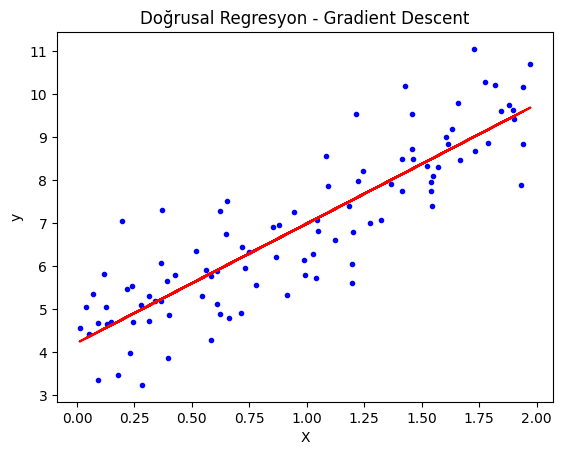

Tahmin edilen parametreler: [[4.21509616]
 [2.77011339]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Veri oluşturma
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Model parametrelerini başlatma
theta = np.random.randn(2, 1)  # rastgele başlatma
X_b = np.c_[np.ones((100, 1)), X]  # X'e bias terimi ekleme

# Hiperparametreler
learning_rate = 0.1
n_iterations = 1000
m = 100

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# Sonuçları çizme
plt.plot(X, y, "b.")
plt.plot(X, X_b.dot(theta), "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Doğrusal Regresyon - Gradient Descent")
plt.show()

print("Tahmin edilen parametreler:", theta)
